In [5]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

In [6]:
import matplotlib as plt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
# Give white background to all our visualisations
sns.set_style('whitegrid')

In [8]:
# Reading Data of stocks from internet using pandas
from pandas_datareader import DataReader

In [9]:
# for importing timestamps
from datetime import datetime

In [11]:
tech_list= ['AAPL','GOOG','MSFT','AMZN']
 
# Putting ENddate as Todays end date
end = datetime.now()
# Putting start date as end date mentioned -1 year
start = datetime(end.year-1,end.month,end.day)

In [12]:
for stock in tech_list:
    globals()[stock]=DataReader(stock,'yahoo',start,end) #what stocks to be taken from yahoo and start date and end date
                            #globals stock is taking that particular company stock and making it as global variable
        

In [13]:
AMZN.head()  # So if we write AMZN then in the above step it was storing amazon name as dataframe name (global variable name)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-05-24,1841.760010,1817.849976,1835.890015,1823.280029,3369700,1823.280029
2019-05-28,1849.270020,1827.349976,1832.750000,1836.430054,3200000,1836.430054
2019-05-29,1830.000000,1807.530029,1823.119995,1819.189941,4279000,1819.189941
2019-05-30,1829.469971,1807.829956,1825.489990,1816.319946,3146900,1816.319946
2019-05-31,1795.589966,1772.699951,1790.010010,1775.069946,4618800,1775.069946


In [14]:
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,252.000000,252.000000,252.000000,252.000000,2.520000e+02,252.000000
mean,254.555437,248.832659,251.306388,251.932698,3.349282e+07,250.445609
std,43.730422,42.514766,42.950183,43.371455,1.722100e+07,43.821127
min,177.919998,170.270004,175.440002,173.300003,1.136200e+07,171.256134
25%,211.697502,207.304996,209.294994,208.999996,2.184540e+07,207.269333
50%,258.020004,248.580002,250.824997,254.549995,2.834300e+07,253.683472
75%,290.190010,283.162514,284.885002,288.317490,3.841992e+07,287.539139
max,327.850006,323.350006,324.739990,327.200012,1.067212e+08,326.316681


In [15]:
GOOG.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2019-05-24 to 2020-05-22
Data columns (total 6 columns):
High         252 non-null float64
Low          252 non-null float64
Open         252 non-null float64
Close        252 non-null float64
Volume       252 non-null int64
Adj Close    252 non-null float64
dtypes: float64(5), int64(1)
memory usage: 13.8 KB


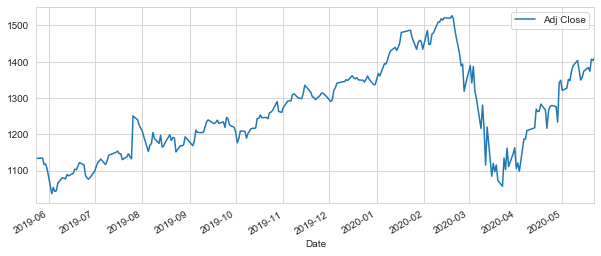

In [16]:
GOOG['Adj Close'].plot(legend=True,figsize=(10,4))

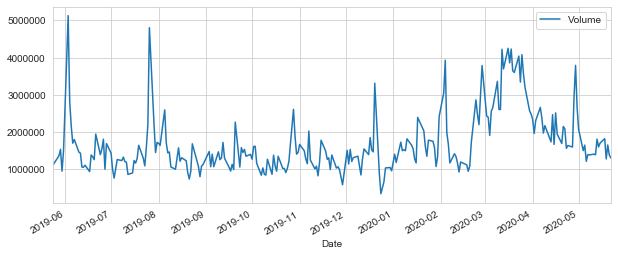

In [17]:
GOOG['Volume'].plot(legend=True,figsize=(10,4))

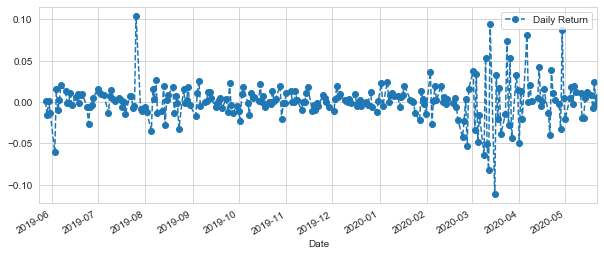

In [18]:
# Daily Returns for Google stock
GOOG['Daily Return']=GOOG['Adj Close'].pct_change()
GOOG['Daily Return'].plot(figsize=(10,4),legend=True,linestyle='--',marker='o')

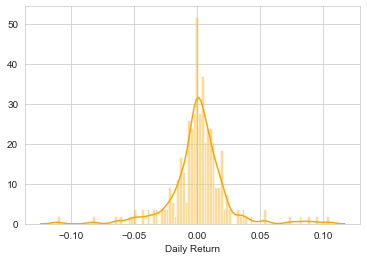

In [19]:
# AVerage Daily return using Histogram # DIstplot for 2 plots togeteher
sns.distplot(GOOG['Daily Return'].dropna(),bins=100,color='orange')

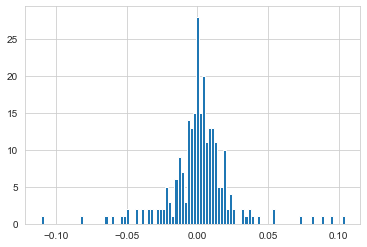

In [20]:
# using hist
GOOG['Daily Return'].hist(bins=100)

In [21]:
closing_df = DataReader(tech_list,'yahoo',start,end)['Adj Close'] # creating closing Df and making it by datareader 
                            #taking Tech_list from yahoo start and end date and values from Adj close

In [22]:
closing_df.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2019-05-24,176.859283,1133.469971,124.705452,1823.280029
2019-05-28,176.128006,1134.150024,124.626442,1836.430054
2019-05-29,175.288025,1116.459961,123.421265,1819.189941
2019-05-30,176.197189,1117.949951,124.201653,1816.319946
2019-05-31,173.005280,1103.630005,122.176575,1775.069946


In [23]:
tech_retrn = closing_df.pct_change()

In [24]:
tech_retrn.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2019-05-24,NaN,NaN,NaN,NaN
2019-05-28,-0.004135,0.000600,-0.000634,0.007212
2019-05-29,-0.004769,-0.015598,-0.009670,-0.009388
2019-05-30,0.005187,0.001335,0.006323,-0.001578
2019-05-31,-0.018116,-0.012809,-0.016305,-0.022711


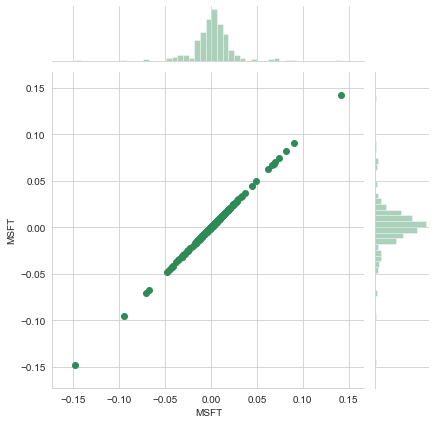

In [25]:
sns.jointplot('MSFT','MSFT',tech_retrn,kind='scatter',color='seagreen')

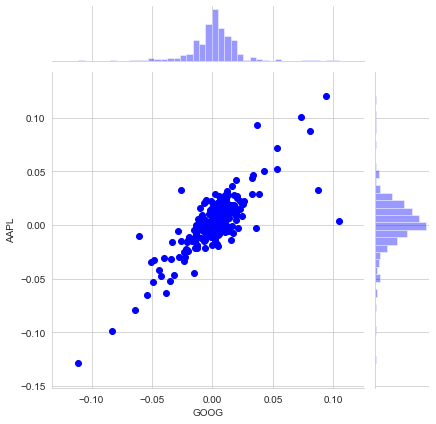

In [26]:
sns.jointplot('GOOG','AAPL',tech_retrn,kind='scatter',color='blue')

In [27]:
tech_retrn.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2019-05-24,NaN,NaN,NaN,NaN
2019-05-28,-0.004135,0.000600,-0.000634,0.007212
2019-05-29,-0.004769,-0.015598,-0.009670,-0.009388
2019-05-30,0.005187,0.001335,0.006323,-0.001578
2019-05-31,-0.018116,-0.012809,-0.016305,-0.022711


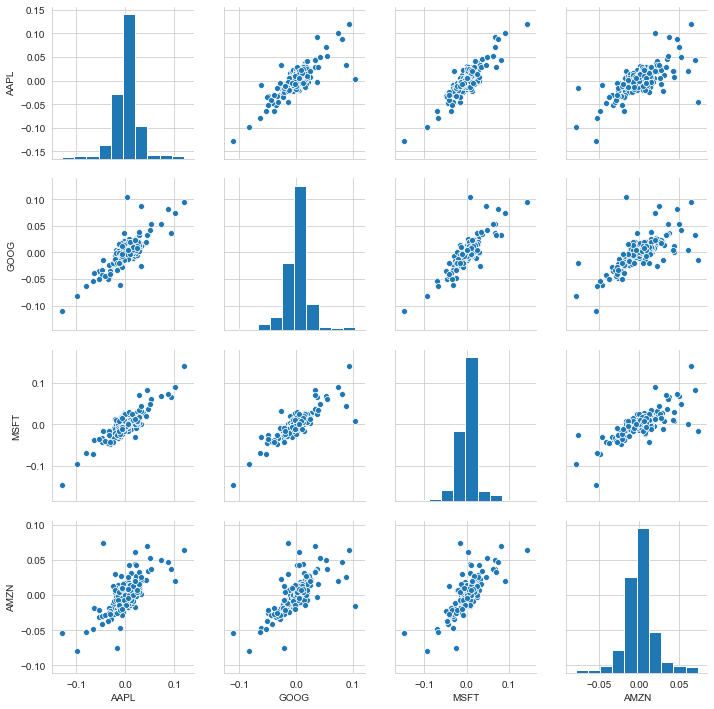

In [28]:
sns.pairplot(tech_retrn.dropna())

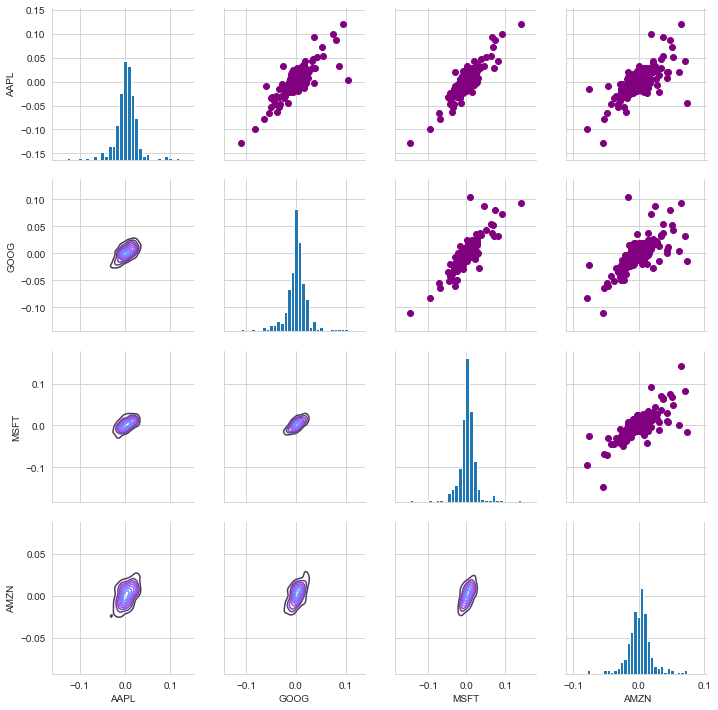

In [29]:
returns_fig = sns.PairGrid(tech_retrn.dropna())

returns_fig.map_upper(plt.scatter,color='purple') # Scatter Plot on upper right side

returns_fig.map_lower(sns.kdeplot,cmap='cool_d') #kde plot on left side on downward increasing

returns_fig.map_diag(plt.hist,bins=30) #plot 30bins hist on the diagonals

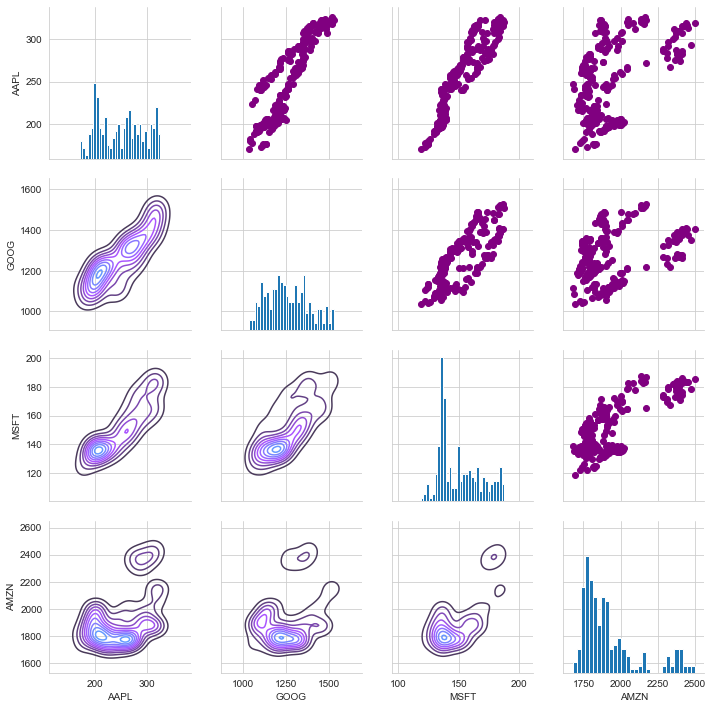

In [30]:
returns_fig = sns.PairGrid(closing_df.dropna())

returns_fig.map_upper(plt.scatter,color='purple') # Scatter Plot on upper right side

returns_fig.map_lower(sns.kdeplot,cmap='cool_d') #kde plot on left side on downward increasing

returns_fig.map_diag(plt.hist,bins=30) #plot 30bins hist on the diagonals

In [31]:
# Stock Risk Analysis
rets=tech_retrn.dropna()

 # Risk of STd dev of daily returns vs expected daily returns
    

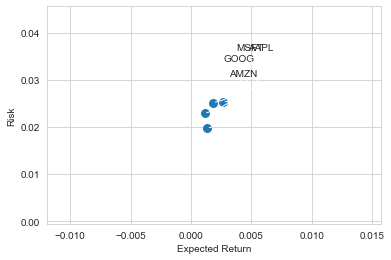

In [36]:
area = np.pi*20  #defining area of this circle for the scatter plots
plt.scatter(rets.mean(),rets.std(),s=area)
plt.xlabel('Expected Return')
plt.ylabel('Risk')
 
for label,x,y in zip(rets.columns, rets.mean(), rets.std()):  #zip allows to pass those 3 diff values (for every column in rets data Frame set xaxis=mean and yaxis=stddeviation)
    plt.annotate(
    label,
    xy = (x,y), xytext= (50,50),
    textcoords = 'offset points',ha='right',va='bottom', #ha= horiz axis, va= vertical axis, arrowprops defing all arrow style and type
    arrowprops = dict(arrowstyle = '-',connectionstyle= 'arc3,rad=-0.5'))

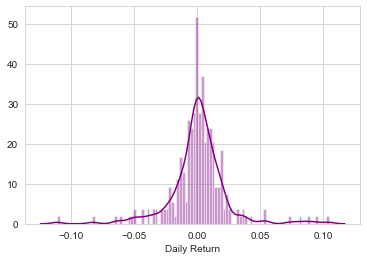

In [37]:
sns.distplot(GOOG['Daily Return'].dropna(),bins=100,color='purple')

In [38]:
rets.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2019-05-28,-0.004135,0.000600,-0.000634,0.007212
2019-05-29,-0.004769,-0.015598,-0.009670,-0.009388
2019-05-30,0.005187,0.001335,0.006323,-0.001578
2019-05-31,-0.018116,-0.012809,-0.016305,-0.022711
2019-06-03,-0.010110,-0.061071,-0.031048,-0.046409


In [43]:
# uSing Quantile to get risk value of stock

rets['GOOG'].quantile(0.05)   #0.05 means 95% confidence that is 95% your estimation is right
#This means the daily loss would not exceed 100times of this i.e. 3.4% So for eg if you invest 100000$ chances of max daily loss is 100000*3.4% = 3400$

-0.034626368578302535

In [44]:
# Risk using Monte Carlo method
days = 365

dt= 1/days

mu=rets.mean()['GOOG']

sigma = rets.std()['GOOG']

In [61]:
def stock_monte_carlo(start_price,days,mu,sigma): #takes startprice no of days you want to take it mu your avg daly returns and your std deviation on those returns
    price = np.zeros(days) #arry full of zero for how much days we have to run it
    price[0] = start_price #first term price day as to start
    
    shock = np.zeros(days) 
    drift = np.zeros(days)
    
    for x in range(1,days):
        shock[x] = np.random.normal(loc=mu*dt,scale= sigma*np.sqrt(dt))
        
        drift[x]= mu* dt
        
        price[x]= price[x-1] + (price[x-1] * drift[x] + shock[x])


In [62]:
GOOG.head()

,High,Low,Open,Close,Volume,Adj Close,Daily Return
Date,,,,,,,
2019-05-24,1149.765015,1131.660034,1147.359985,1133.469971,1112000,1133.469971,NaN
2019-05-28,1151.587036,1133.119995,1134.000000,1134.150024,1365000,1134.150024,0.000600
2019-05-29,1129.099976,1108.219971,1127.520020,1116.459961,1538200,1116.459961,-0.015598
2019-05-30,1123.130005,1112.119995,1115.540039,1117.949951,951900,1117.949951,0.001335
2019-05-31,1109.599976,1100.180054,1101.290039,1103.630005,1507800,1103.630005,-0.012809
